In [1]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

In [2]:
# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [52]:
# Now we load a few databases
#BHSa2017 = use('etcbc/bhsa', version='2017')
#BHSaLatest = use('etcbc/bhsa:latest')
#BHSaC = use('etcbc/bhsa', version='c', mod='CenterBLC/BHSaddons/tf')
BHS = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf', hoist=globals())
bhsF, bhsL, bhsT, bhsS = BHS.api.F, BHS.api.L, BHS.api.T, BHS.api.S

LXX = use("CenterBLC/LXX", version="1935", hoist=globals())
lxxF, lxxL, lxxT, lxxS = LXX.api.F, LXX.api.L, LXX.api.T, LXX.api.S

DSS = use('etcbc/dss', hoist=globals())
dssF, dssL, dssT, dssS = DSS.api.F, DSS.api.L, DSS.api.T, DSS.api.S

GNT = use ("CenterBLC/N1904", version="1.0.0", mod="CenterBLC/N1904/BOLcomplement/tf/", hoist=globals())
gntF, gntL, gntT, gntS = GNT.api.F, GNT.api.L, GNT.api.T, GNT.api.S

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,57,10941.98,100
chapter,1192,523.23,100
verse,30371,20.54,100
subverse,30419,20.50,100
word,623693,1.00,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
scroll,1001,1428.81,100
lex,10450,129.14,94
fragment,11182,127.91,100
line,52895,27.04,100
clause,125,12.85,0
cluster,101099,6.68,47
phrase,315,5.10,0
word,500995,2.81,99
sign,1430241,1.00,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,27,5102.93,100
chapter,260,529.92,100
verse,7944,17.34,100
sentence,8011,17.20,100
group,8945,7.01,46
clause,42506,8.36,258
wg,106868,6.88,533
phrase,69007,1.90,95
subphrase,116178,1.60,135
word,137779,1.00,100


Display is setup for viewtype [syntax-view](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/syntax-view.md#start)

See [here](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/viewtypes.md#start) for more information on viewtypes

In [262]:
from IPython.display import Image, display

# Finding Referential Information: Sample Case: Divine Attribution

Referential information is organized in terms of `child` - `mother` relationships.

See here:

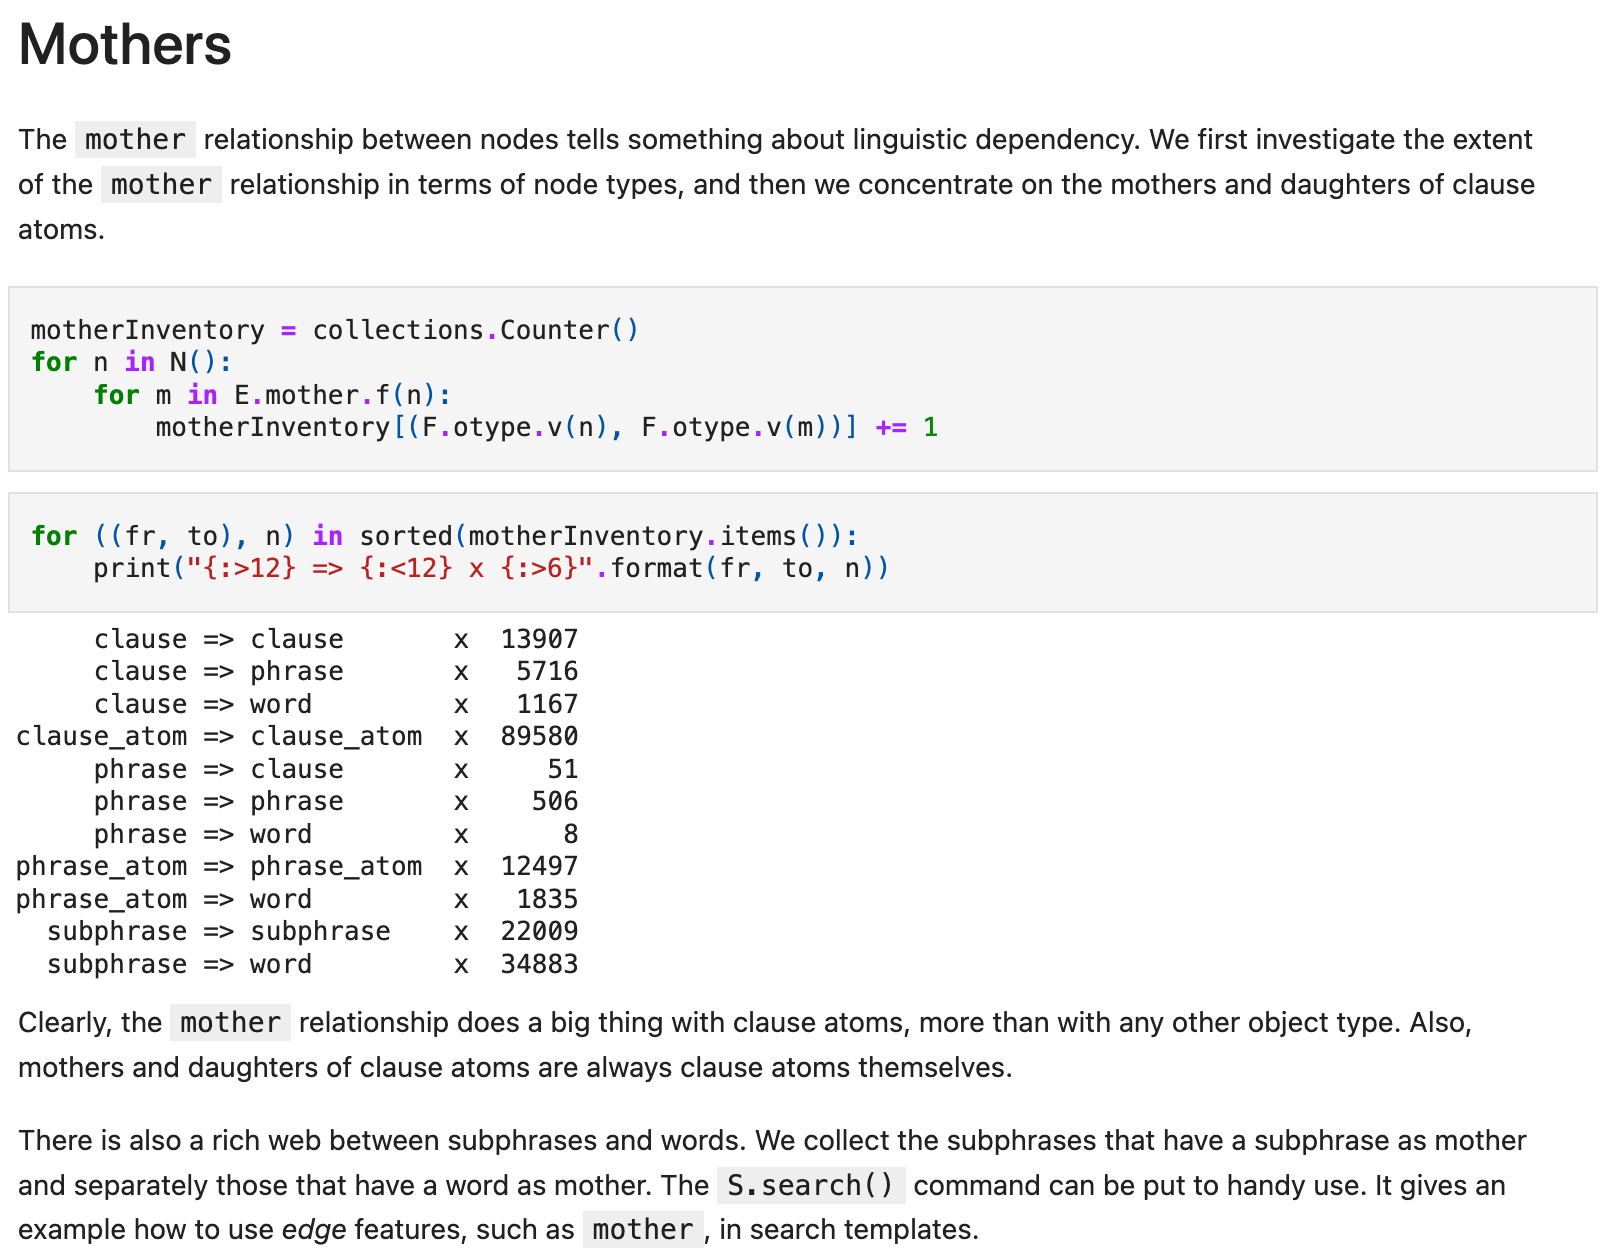



In [99]:
bhsS.relationsLegend()

                      = left equal to right (as node)
                      # left unequal to right (as node)
                      < left before right (in canonical node ordering)
                      > left after right (in canonical node ordering)
                     == left occupies same slots as right
                     && left has overlapping slots with right
                     ## left and right do not have the same slot set
                     || left and right do not have common slots
                     [[ left embeds right
                     ]] left embedded in right
                     << left completely before right
                     >> left completely after right
                     =: left and right start at the same slot
                     := left and right end at the same slot
                     :: left and right start and end at the same slot
                     <: left immediately before right
                     :> left immediately after right
   

## Looking for Divine Attribution

This query finds all cases in which YHWH, Elohim, or El are attributed by adjectival sub-phrases. For example: 


>And he was the priest of **[God{mother-subphrase}, the most high{daughter-subphrase}]**


The TF query below recreates the following SHEBANQ/EMDROS query: http://shebanq.ancient-data.org/hebrew/query?version=2021&id=1124

In [90]:
DivineAttributesNo1 = '''
verse book
 subphrase rela=atr
 -mother> subphrase
     word lex=JHWH/|>LHJM/|>L/


'''
DivineAttributesNo1  = BHS.search(DivineAttributesNo1)
BHS.table(DivineAttributesNo1, start=1, end=3, condensed=False, extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type'},  colorMap={2: 'magenta', 3:'red', 4:'lightblue'})

  0.30s 136 results


n,p,verse,subphrase,subphrase,word
1,Genesis 14:18,,עֶלְיֹֽון׃,אֵ֥ל,אֵ֥ל
2,Genesis 14:19,,עֶלְיֹ֔ון,אֵ֣ל,אֵ֣ל
3,Genesis 14:20,,עֶלְיֹ֔ון,אֵ֣ל,אֵ֣ל


This query finds all nominal clauses (NC) in which YHWH/Elohim/El are attributed by means of an adjectival predicate compliment (the element that functions as a predicate in nominal clauses). For example:

>**God{Subj}** (is) **good {PreC})**.

The TF query below recreates the following SHEBANQ/EMDROS query: http://shebanq.ancient-data.org/hebrew/query?version=2021&id=1125


In [93]:
DivineAttributesNo1 = '''
clause kind=NC
/without/
  word lex=DBR/|XMH/|JWM/|BJT/|JR>H/|M>RH/|M<FH/|QRBH/|PNH/|<JN/|>MRH/|DRK/
/-/
/without/
  word sp=prep
/-/
  phrase function=Subj
    word lex=JHWH/|>LHJM/|>L/
  phrase function=PreC
    word sp=adjv


'''
DivineAttributesNo1  = BHS.search(DivineAttributesNo1)
BHS.table(DivineAttributesNo1, start=1, end=3, condensed=False, extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type'},  colorMap={2: 'magenta', 3:'red', 4:'lightblue'})

  0.91s 112 results


n,p,clause,phrase,word,phrase,word
1,Exodus 9:27,יְהוָה֙ הַצַּדִּ֔יק,יְהוָה֙,יְהוָה֙,הַצַּדִּ֔יק,צַּדִּ֔יק
2,Exodus 20:5,כִּ֣י אָֽנֹכִ֞י יְהוָ֤ה אֱלֹהֶ֨יךָ֙ אֵ֣ל קַנָּ֔א,אָֽנֹכִ֞י יְהוָ֤ה אֱלֹהֶ֨יךָ֙,יְהוָ֤ה,אֵ֣ל קַנָּ֔א,קַנָּ֔א
3,Exodus 20:5,כִּ֣י אָֽנֹכִ֞י יְהוָ֤ה אֱלֹהֶ֨יךָ֙ אֵ֣ל קַנָּ֔א,אָֽנֹכִ֞י יְהוָ֤ה אֱלֹהֶ֨יךָ֙,אֱלֹהֶ֨יךָ֙,אֵ֣ל קַנָּ֔א,קַנָּ֔א


This query finds all attributive clauses that refer to YHWH, Elohim, or El. Thus, these attributive clauses are describing God in some further detail. For example:

>This is **JHWH**, **who spoke to her{relative clause}**

The TF query below recreates the following SHEBANQ/EMDROS query: http://shebanq.ancient-data.org/hebrew/query?version=2021&id=1121


In [96]:
DivineAttributesNo1 = '''
verse book
 clause rela=Attr
 -mother> word lex=>LHJM/|JHWH/|>L/


'''
DivineAttributesNo1  = BHS.search(DivineAttributesNo1)
BHS.table(DivineAttributesNo1, start=1, end=3, condensed=False, hiddenTypes={'half_verse', 'sentence_atom', 'phrase_atom'}, extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type', 'rela'})

  0.23s 20 results


n,p,verse,clause,word
1,Genesis 3:5,,יֹדְעֵ֖י טֹ֥וב וָרָֽע׃,אלֹהִ֔ים
2,Genesis 3:8,,מִתְהַלֵּ֥ךְ בַּגָּ֖ן לְר֣וּחַ הַיֹּ֑ום,יְהוָ֧ה
3,Genesis 16:13,,הַדֹּבֵ֣ר אֵלֶ֔יהָ,יְהוָה֙


## Looking for the Antecedent/Reference of a BN/

In [281]:
ReferenceIdentificationNo1 = '''
book book
 clause rela=Attr
   word gn=f
 -mother> word lex=BN/ gn=m

'''
ReferenceIdentificationNo1  = BHS.search(ReferenceIdentificationNo1)
BHS.table(ReferenceIdentificationNo1, start=1, end=10, condensed=False,\
          hiddenTypes={'half_verse', 'sentence_atom', 'phrase_atom'},\
          extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type', 'rela'},\
          colorMap={2: 'magenta', 3:'lightgreen', 4:'lightblue'})

  0.76s 10 results


n,p,book,clause,word,word
1,Genesis 16:15,Genesis,אֲשֶׁר־יָלְדָ֥ה הָגָ֖ר,יָלְדָ֥ה,בְּנֹ֛ו
2,Genesis 16:15,Genesis,אֲשֶׁר־יָלְדָ֥ה הָגָ֖ר,הָגָ֖ר,בְּנֹ֛ו
3,Genesis 24:24,Genesis,אֲשֶׁ֥ר יָלְדָ֖ה לְנָחֹֽור׃,יָלְדָ֖ה,בֶּן־
4,Genesis 24:47,Genesis,אֲשֶׁ֥ר יָֽלְדָה־לֹּ֖ו מִלְכָּ֑ה,יָֽלְדָה־,בֶּן־
5,Genesis 24:47,Genesis,אֲשֶׁ֥ר יָֽלְדָה־לֹּ֖ו מִלְכָּ֑ה,מִלְכָּ֑ה,בֶּן־
6,Numbers 3:38,Numbers,שֹֽׁמְרִים֙ מִשְׁמֶ֣רֶת הַמִּקְדָּ֔שׁ לְמִשְׁמֶ֖רֶת בְּנֵ֣י יִשְׂרָאֵ֑ל,מִשְׁמֶ֣רֶת,בָנָ֗יו
7,Numbers 3:38,Numbers,שֹֽׁמְרִים֙ מִשְׁמֶ֣רֶת הַמִּקְדָּ֔שׁ לְמִשְׁמֶ֖רֶת בְּנֵ֣י יִשְׂרָאֵ֑ל,מִשְׁמֶ֖רֶת,בָנָ֗יו
8,1_Samuel 17:13,1_Samuel,אֲשֶׁ֤ר הָלְכוּ֙ בַּמִּלְחָמָ֔ה,מִּלְחָמָ֔ה,בָּנָ֗יו
9,Ezekiel 16:36,Ezekiel,אֲשֶׁ֥ר נָתַ֖תְּ לָהֶֽם׃,נָתַ֖תְּ,בָנַ֔יִךְ
10,Ezekiel 23:9,Ezekiel,אֲשֶׁ֥ר עָגְבָ֖ה עֲלֵיהֶֽם׃,עָגְבָ֖ה,בְּנֵ֣י


In [282]:
ReferenceIdentificationNo2 = '''
book book
 clause rela=Attr
     word gn=f
 -mother> phrase 
             word lex=BN/ gn=m

'''
ReferenceIdentificationNo2  = BHS.search(ReferenceIdentificationNo2)
BHS.table(ReferenceIdentificationNo2, start=1, end=19, condensed=False,\
          hiddenTypes={'half_verse', 'sentence_atom', 'phrase_atom'},\
          extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type', 'rela'}, \
          colorMap={2: 'magenta', 3:'lightgreen', 4:'lightblue'})

  0.70s 89 results


n,p,book,clause,word,phrase,word
1,Genesis 9:18,Genesis,הַיֹּֽצְאִים֙ מִן־הַתֵּבָ֔ה,תֵּבָ֔ה,בְנֵי־נֹ֗חַ,בְנֵי־
2,Genesis 21:3,Genesis,אֲשֶׁר־יָלְדָה־לֹּ֥ו שָׂרָ֖ה,יָלְדָה־,אֶֽת־שֶׁם־בְּנֹ֧ו,בְּנֹ֧ו
3,Genesis 21:3,Genesis,אֲשֶׁר־יָלְדָה־לֹּ֥ו שָׂרָ֖ה,שָׂרָ֖ה,אֶֽת־שֶׁם־בְּנֹ֧ו,בְּנֹ֧ו
4,Genesis 21:9,Genesis,אֲשֶׁר־יָלְדָ֥ה לְאַבְרָהָ֖ם,יָלְדָ֥ה,אֶֽת־בֶּן־הָגָ֧ר הַמִּצְרִ֛ית,בֶּן־
5,Genesis 41:50,Genesis,אֲשֶׁ֤ר יָֽלְדָה־לֹּו֙ אָֽסְנַ֔ת בַּת־פֹּ֥וטִי פֶ֖רַע כֹּהֵ֥ן אֹֽון׃,יָֽלְדָה־,שְׁנֵ֣י בָנִ֔ים,בָנִ֔ים
6,Genesis 41:50,Genesis,אֲשֶׁ֤ר יָֽלְדָה־לֹּו֙ אָֽסְנַ֔ת בַּת־פֹּ֥וטִי פֶ֖רַע כֹּהֵ֥ן אֹֽון׃,אָֽסְנַ֔ת,שְׁנֵ֣י בָנִ֔ים,בָנִ֔ים
7,Genesis 41:50,Genesis,אֲשֶׁ֤ר יָֽלְדָה־לֹּו֙ אָֽסְנַ֔ת בַּת־פֹּ֥וטִי פֶ֖רַע כֹּהֵ֥ן אֹֽון׃,בַּת־,שְׁנֵ֣י בָנִ֔ים,בָנִ֔ים
8,Genesis 46:15,Genesis,אֲשֶׁ֨ר יָֽלְדָ֤ה לְיַעֲקֹב֙ בְּפַדַּ֣ן אֲרָ֔ם,יָֽלְדָ֤ה,בְּנֵ֣י לֵאָ֗ה,בְּנֵ֣י
9,Genesis 46:26,Genesis,הַבָּאָ֨ה לְיַעֲקֹ֤ב מִצְרַ֨יְמָה֙,בָּאָ֨ה,כָּל־הַ֠נֶּפֶשׁ מִלְּבַ֖ד נְשֵׁ֣י בְנֵי־יַעֲקֹ֑ב,בְנֵי־
10,Genesis 46:26,Genesis,יֹצְאֵ֣י יְרֵכֹ֔ו,יְרֵכֹ֔ו,כָּל־הַ֠נֶּפֶשׁ מִלְּבַ֖ד נְשֵׁ֣י בְנֵי־יַעֲקֹ֑ב,בְנֵי־


In [284]:
ReferenceIdentificationNo2 = '''
book book
 clause rela=Attr
     word gn=f
 -mother> phrase 
             word lex=BN/ gn=m

'''
ReferenceIdentificationNo2  = BHS.search(ReferenceIdentificationNo2)
BHS.table(ReferenceIdentificationNo2, start=1, end=19, condensed=False,\
          hiddenTypes={'half_verse', 'sentence_atom', 'phrase_atom'},\
          extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type', 'rela'}, \
          colorMap={2: 'magenta', 3:'lightgreen', 4:'lightblue'})

  0.66s 89 results


n,p,book,clause,word,phrase,word
1,Genesis 9:18,Genesis,הַיֹּֽצְאִים֙ מִן־הַתֵּבָ֔ה,תֵּבָ֔ה,בְנֵי־נֹ֗חַ,בְנֵי־
2,Genesis 21:3,Genesis,אֲשֶׁר־יָלְדָה־לֹּ֥ו שָׂרָ֖ה,יָלְדָה־,אֶֽת־שֶׁם־בְּנֹ֧ו,בְּנֹ֧ו
3,Genesis 21:3,Genesis,אֲשֶׁר־יָלְדָה־לֹּ֥ו שָׂרָ֖ה,שָׂרָ֖ה,אֶֽת־שֶׁם־בְּנֹ֧ו,בְּנֹ֧ו
4,Genesis 21:9,Genesis,אֲשֶׁר־יָלְדָ֥ה לְאַבְרָהָ֖ם,יָלְדָ֥ה,אֶֽת־בֶּן־הָגָ֧ר הַמִּצְרִ֛ית,בֶּן־
5,Genesis 41:50,Genesis,אֲשֶׁ֤ר יָֽלְדָה־לֹּו֙ אָֽסְנַ֔ת בַּת־פֹּ֥וטִי פֶ֖רַע כֹּהֵ֥ן אֹֽון׃,יָֽלְדָה־,שְׁנֵ֣י בָנִ֔ים,בָנִ֔ים
6,Genesis 41:50,Genesis,אֲשֶׁ֤ר יָֽלְדָה־לֹּו֙ אָֽסְנַ֔ת בַּת־פֹּ֥וטִי פֶ֖רַע כֹּהֵ֥ן אֹֽון׃,אָֽסְנַ֔ת,שְׁנֵ֣י בָנִ֔ים,בָנִ֔ים
7,Genesis 41:50,Genesis,אֲשֶׁ֤ר יָֽלְדָה־לֹּו֙ אָֽסְנַ֔ת בַּת־פֹּ֥וטִי פֶ֖רַע כֹּהֵ֥ן אֹֽון׃,בַּת־,שְׁנֵ֣י בָנִ֔ים,בָנִ֔ים
8,Genesis 46:15,Genesis,אֲשֶׁ֨ר יָֽלְדָ֤ה לְיַעֲקֹב֙ בְּפַדַּ֣ן אֲרָ֔ם,יָֽלְדָ֤ה,בְּנֵ֣י לֵאָ֗ה,בְּנֵ֣י
9,Genesis 46:26,Genesis,הַבָּאָ֨ה לְיַעֲקֹ֤ב מִצְרַ֨יְמָה֙,בָּאָ֨ה,כָּל־הַ֠נֶּפֶשׁ מִלְּבַ֖ד נְשֵׁ֣י בְנֵי־יַעֲקֹ֑ב,בְנֵי־
10,Genesis 46:26,Genesis,יֹצְאֵ֣י יְרֵכֹ֔ו,יְרֵכֹ֔ו,כָּל־הַ֠נֶּפֶשׁ מִלְּבַ֖ד נְשֵׁ֣י בְנֵי־יַעֲקֹ֑ב,בְנֵי־


## References of Pronouns (including suffixes)

We want to find cases like: "From the fruit of the tree" being referred to by "it" in the clause:


"*From the fruit of the tree* ... not you shall eat from **it**."

In [288]:
FruitNo1 = '''
verse book=Genesis chapter=3 verse=3
 phrase
 -mother> phrase


'''
FruitNo1  = BHS.search(FruitNo1)
BHS.table(FruitNo1, start=1, end=19, condensed=False,\
          hiddenTypes={'half_verse', 'sentence_atom', 'phrase_atom', 'subphrase', 'clause_atom'},\
          extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type', 'rela'}, \
          colorMap={2: 'magenta', 3:'lightgreen', 4:'lightblue'})

  0.08s 1 result


n,p,verse,phrase,phrase
1,Genesis 3:3,,מִמֶּ֔נּוּ,מִפְּרִ֣י הָעֵץ֮


In [291]:
FruitNo1 = '''
verse book
 phrase
 -mother> phrase


'''
FruitNo1  = BHS.search(FruitNo1)
BHS.table(FruitNo1, start=1, end=19, condensed=False,\
          hiddenTypes={'half_verse', 'sentence_atom', 'phrase_atom', 'subphrase', 'clause_atom'},\
          extraFeatures={'mother', 'distributional_parent', 'functional_parent', 'mother_object_type', 'rela'}, \
          colorMap={2: 'magenta', 3:'lightgreen', 4:'lightblue'})

  0.36s 539 results


n,p,verse,phrase,phrase
1,Genesis 2:14,,ה֥וּא,הַנָּהָ֥ר הָֽרְבִיעִ֖י
2,Genesis 2:17,,מִמֶּ֑נּוּ,מֵעֵ֗ץ הַדַּ֨עַת֙ טֹ֣וב וָרָ֔ע
3,Genesis 2:19,,ה֥וּא,כֹל֩
4,Genesis 3:3,,מִמֶּ֔נּוּ,מִפְּרִ֣י הָעֵץ֮
5,Genesis 3:12,,הִ֛וא,הָֽאִשָּׁה֙
6,Genesis 6:17,,הִנְנִי֩,אֲנִ֗י
7,Genesis 6:19,,שְׁנַ֧יִם מִכֹּ֛ל,מִכָּל־הָ֠חַי מִֽכָּל־בָּשָׂ֞ר
8,Genesis 6:20,,שְׁנַ֧יִם מִכֹּ֛ל,מֵהָעֹ֣וף לְמִינֵ֗הוּ וּמִן־הַבְּהֵמָה֙ לְמִינָ֔הּ מִכֹּ֛ל רֶ֥מֶשׂ הָֽאֲדָמָ֖ה לְמִינֵ֑הוּ
9,Genesis 7:1,,צַדִּ֥יק לְפָנַ֖י,אֹתְךָ֥
10,Genesis 9:6,,דָּמֹ֣ו,שֹׁפֵךְ֙ דַּ֣ם הָֽאָדָ֔ם


# Finding Soundplays in the HB

## Introduction

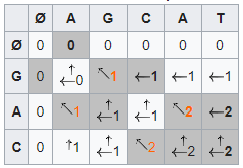

In this section I will use the LCS (Longest Common Subsequence) algorithm for finding similar sounding word pairs in the ETCBC database. The problem was first brought up by [Lidvar Andvik (PhD student, Andrews University, SDATS)](https://www.linkedin.com/in/lidvar-andvik-1ba849182).

He was asking whether it is possible to detect similar sounding word pairs in the TNK. As an example he used [Isa 53:11](https://ref.ly/logosres/bhssesb?ref=BibleBHS.Is53.11):


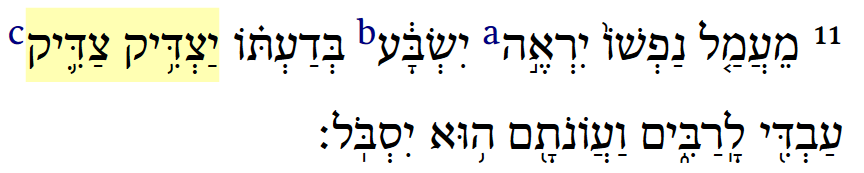

As one can see the words used in predicate and object position are very similar and belong to the same lexical family. However, they are two different lexemes:

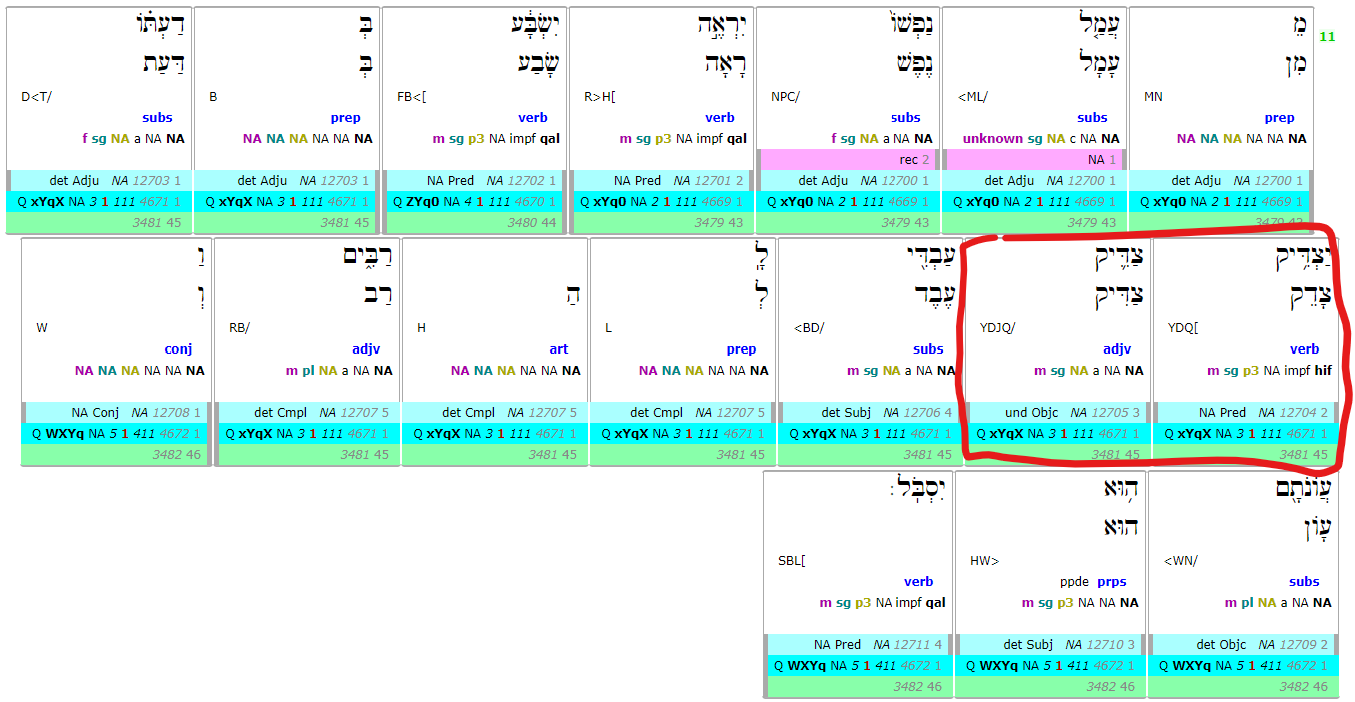

See the syntactic structure on SHEBANQ ([bhsa4 Isaiah 53:1](https://shebanq.ancient-data.org/hebrew/text?qactive=hlcustom&qsel_one=grey&qpub=x&qget=x&wactive=hlcustom&wsel_one=gray&wpub=x&wget=x&nactive=hlcustom&nsel_one=black&npub=v&nget=x&chapter=53&lang=en&book=Jesaia&qw=m&tr=hb&tp=txt_p&iid=&verse=1&version=4&mr=m&page=1&wd4_statfl=v&ph_arela=v&wd4_statrl=v&sn_an=v&cl=v&wd1_lang=x&wd1_subpos=x&wd2_person=v&sp_rela=v&wd1_pdp=x&sn_n=v&wd3_uvf=x&ph_fun=v&wd1_nmtp=v&gl=v&sp_n=v&pt=v&ph_an=v&ph_typ=x&cl_typ=v&tt=v&wd4_statro=x&wd3_vbs=x&wd1=v&tl=x&wd3=x&wd4=v&wd2_gender=v&ph=v&wd3_vbe=v&wd1_pos=v&ph_det=v&ph_rela=x&wd4_statfo=x&tl_tlv=x&wd2_stem=v&wd2_state=v&ht=v&ph_n=v&tl_tlc=x&cl_tab=v&wd3_nme=x&hl=v&cl_par=v&cl_an=v&cl_n=v&wd3_prs=v&wd3_pfm=x&sp=v&cl_code=v&ht_hk=v&wd2=v&hl_hlc=x&cl_rela=v&wd2_gnumber=v&wd2_tense=v&cl_txt=v&wd1_n=x&sn=v&ht_ht=v&hl_hlv=v&pref=alt))

In this notebook, then, I will do the following:
1. Use a LCS algorithm and adapt it to work with python3.
2. Run some simple tests.
3. Build a BHS based TF query and store the results as a dataframe.
4. Load the query results as a pandas dataframe and clean up the table.
5. Run the LCS algrorithm throgh each row of the dataframe.

For an introduction to the LCS approach see the following links: https://en.wikipedia.org/wiki/Longest_common_subsequence_problem
https://youtu.be/sSno9rV8Rhg

For the coding of the LCS alogrithm see: https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/

**Recognition**: I am particularly thankful for the tips and insights received from (Rodeney Summerscales, Prof of Computer Science, Andrews University)[https://www.andrews.edu/~summersc/]. He helped me understand the LCS algorithm and hinted at the `apply` function for processing an entire data frame.

## Prelude
We first load the different pyhton functions and the Text Fabric tool with its BHS database.

In [297]:
%load_ext autoreload
%autoreload 2

In [299]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections, math, random, re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [301]:
A = use('bhsa', hoist=globals())

**Locating corpus resources ...**

The requested app is not available offline
	~/text-fabric-data/github/annotation/app-bhsa/code not found


Cannot follow https:/github.com/annotation/app-bhsa/releases/latest: HTTP Error 404: Not Found


rate limit is 5000 requests per hour, with 5000 left for this hour
	connecting to online GitHub repo annotation/app-bhsa ... failed
unexpected error from github.GithubException: 404 {"message": "Not Found", "documentation_url": "https:/docs.github.com/rest/repos/repos#get-a-repository", "status": "404"}


The requested app is not available offline


  0.00s Not all of the warp features otype and oslots are present in
None/bhsa
  0.00s Only the Feature and Edge APIs will be enabled
  0.00s Warp feature "otext" not found. Working without Text-API



Traceback (most recent call last):
  File "/Users/oliverglanz/anaconda3/lib/python3.11/site-packages/tf/advanced/app.py", line 691, in findApp
    app = appClass(
          ^^^^^^^^^
  File "/Users/oliverglanz/anaconda3/lib/python3.11/site-packages/tf/advanced/app.py", line 222, in __init__
    linksApi(self, silent=silent)
  File "/Users/oliverglanz/anaconda3/lib/python3.11/site-packages/tf/advanced/links.py", line 186, in linksApi
    header(app, allMeta=silent == VERBOSE)
  File "/Users/oliverglanz/anaconda3/lib/python3.11/site-packages/tf/advanced/links.py", line 230, in header
    nodeInfo = _nodeTypeInfo(app)
               ^^^^^^^^^^^^^^^^^^
  File "/Users/oliverglanz/anaconda3/lib/python3.11/site-packages/tf/advanced/links.py", line 558, in _nodeTypeInfo
    levels = api.C.levels.data
             ^^^^^^^^^^^^
AttributeError: 'Computeds' object has no attribute 'levels'
TF is not loaded


## Longest Common Subsequence function as `LCS`
### Defining `LCS`
Here I am following to a great extent the code found here:

https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/

and

https://www.geeksforgeeks.org/printing-longest-common-subsequence/


Its python2 based code and needs to be fixed so that it can run within a python3 based environment (`xrange` => `range`).

In [303]:
# Dynamic programming implementation of LCS problem 
  
# Returns length of LCS for X[0..m-1], Y[0..n-1]  
def lcs(X, Y, m, n): 
    L = [[0 for x in range(n+1)] for x in range(m+1)] 
  
    # Following steps build L[m+1][n+1] in bottom up fashion. Note 
    # that L[i][j] contains length of LCS of X[0..i-1] and Y[0..j-1]  
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0: 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1] + 1
            else: 
                L[i][j] = max(L[i-1][j], L[i][j-1]) 
  
    # Following code is used to print LCS 
    index = L[m][n] 
  
    # Create a character array to store the lcs string 
    lcs = [""] * (index+1) 
    lcs[index] = "" 
  
    # Start from the right-most-bottom-most corner and 
    # one by one store characters in lcs[] 
    i = m 
    j = n 
    while i > 0 and j > 0: 
  
        # If current character in X[] and Y are same, then 
        # current character is part of LCS 
        if X[i-1] == Y[j-1]: 
            lcs[index-1] = X[i-1] 
            i-=1
            j-=1
            index-=1
  
        # If not same, then find the larger of two and 
        # go in the direction of larger value 
        elif L[i-1][j] > L[i][j-1]: 
            i-=1
        else: 
            j-=1
    # Now we want to print the results
    print("LCS of " + X + " and " + Y + " is " + "".join(lcs))

### Testing LCS
#### Simple Test with Latin characters

In [307]:
# Driver program 
X = "AGGTAB"
Y = "GXTXAYB"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of AGGTAB and GXTXAYB is GTAB


### Simple Test with Hebrew characters form Isa 53:11
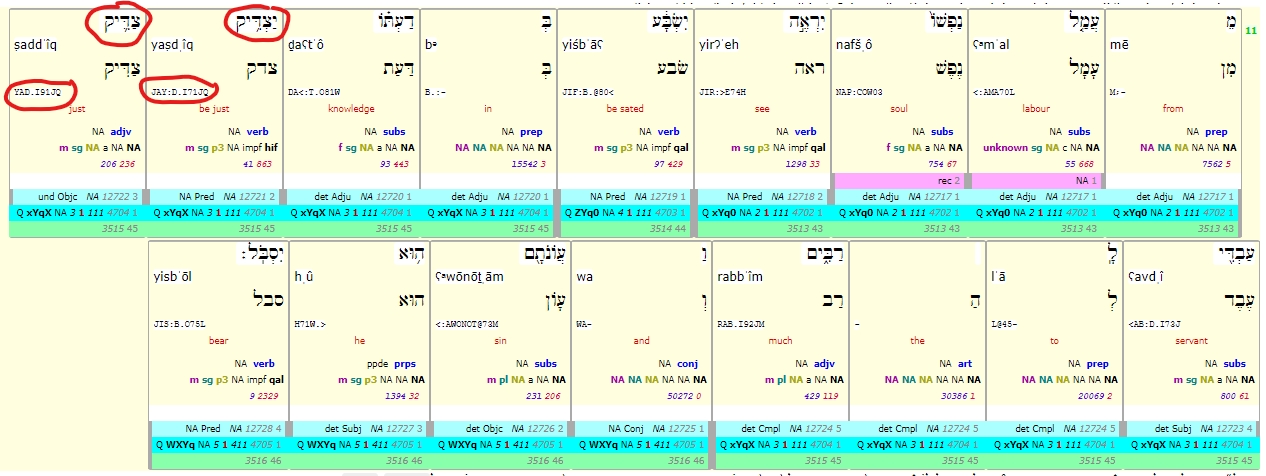


In [310]:
X = "יַצְדִּ֥יק"
Y = "צַדִּ֛יק"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of יַצְדִּ֥יק and צַדִּ֛יק is צדִּיק


In [312]:
X = "JAY:D.I71JQ"
Y = "YAD.I91JQ"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of JAY:D.I71JQ and YAD.I91JQ is YD.I1JQ


There are two alternatives of applying the function:

In [315]:
# Option#1
X = "testing"
Y = "rest"
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of testing and rest is est


In [317]:
# Option#2
lcs("testing", "rest", len("testing"), len("rest")) 

LCS of testing and rest is est


#### Experimenting with Lists...

In [320]:
preds = ["bites", "drinks"]
objcs = ["Brits", "drunk"]
X = preds[0]
Y = objcs[0]
m = len(X) 
n = len(Y) 
lcs(X, Y, m, n) 

LCS of bites and Brits is its


## Producing a dataframe for our `LCS` function
### Building and Running a TF query
For the purpose of testing our workflow we will create just a very limited dataframe by searching only predicates with the lexeme YDQ[ and the attached object phrase. We also make sure that there is only one word appearing in each Predicate and Object phrase by using `::`. 

In [330]:
PredObjcWordLists = '''
book
 clause
    phrase function=Pred
        :: word lex=YDQ[
    phrase function=Objc
        :: word lex   
'''
PredObjcWordLists  = BHS.search(PredObjcWordLists)
BHS.table(PredObjcWordLists, start=1, end=5, condensed=False)

  0.84s 6 results


n,p,book,clause,phrase,word,phrase,word
1,Exodus 23:7,Exodus,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,אַצְדִּ֖יק,רָשָֽׁע׃,רָשָֽׁע׃
2,Isaiah 53:11,Isaiah,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽרַבִּ֑ים,יַצְדִּ֥יק,יַצְדִּ֥יק,צַדִּ֛יק,צַדִּ֛יק
3,Jeremiah 3:11,Jeremiah,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִבֹּגֵדָ֖ה יְהוּדָֽה׃,צִדְּקָ֥ה,צִדְּקָ֥ה,נַפְשָׁ֖הּ,נַפְשָׁ֖הּ
4,Job 9:2,Job,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,יִּצְדַּ֖ק,מַה־,מַה־
5,Job 27:5,Job,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,אַצְדִּ֢יק,אֶ֫תְכֶ֥ם,אֶ֫תְכֶ֥ם


### Exporting the TF query results and loading them as a pandas dataframe

In [333]:
BHS.export(PredObjcWordLists, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='PredObjcWordLists.tsv')

In [335]:
PredObjcWordLists=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/PredObjcWordLists.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
PredObjcWordLists.head()

,R,S1,S2,S3,NODE1,TYPE1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,lex4,NODE5,TYPE5,TEXT5,function5,NODE6,TYPE6,TEXT6,lex6
0,1,Exodus,23,7,426592,book,436037,clause,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,677137,phrase,אַצְדִּ֖יק,Pred,41142,word,אַצְדִּ֖יק,YDQ[,677138,phrase,רָשָֽׁע׃,Objc,41143,word,רָשָֽׁע׃,RC</
1,2,Isaiah,53,11,426602,book,472766,clause,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,786392,phrase,יַצְדִּ֥יק,Pred,230739,word,יַצְדִּ֥יק,YDQ[,786393,phrase,צַדִּ֛יק,Objc,230740,word,צַדִּ֛יק,YDJQ/
2,3,Jeremiah,3,11,426603,book,474156,clause,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,790186,phrase,צִדְּקָ֥ה,Pred,236233,word,צִדְּקָ֥ה,YDQ[,790187,phrase,נַפְשָׁ֖הּ,Objc,236234,word,נַפְשָׁ֖הּ,NPC/
3,4,Job,9,2,426618,book,498095,clause,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,854748,phrase,יִּצְדַּ֖ק,Pred,338288,word,יִּצְדַּ֖ק,YDQ[,854747,phrase,מַה־,Objc,338287,word,מַה־,MH
4,5,Job,27,5,426618,book,499264,clause,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,858011,phrase,אַצְדִּ֢יק,Pred,342412,word,אַצְדִּ֢יק,YDQ[,858012,phrase,אֶ֫תְכֶ֥ם,Objc,342413,word,אֶ֫תְכֶ֥ם,>T


### Cleaning up the dataframe
#### Lets first drop some irrelelvant columns

In [338]:
PredObjcWordLists=PredObjcWordLists.drop(columns=["NODE1", "NODE1", "NODE2", "NODE3", "NODE4", "NODE5", "NODE6", "TYPE1", "TYPE2", "TYPE3", "lex4", "lex6"])
PredObjcWordLists

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את


#### Lets now rename some column names

In [341]:
PredObjcWordLists.rename(columns={"S1": "book", "S2": "chapter", "S3": "verse", "TEXT2": "clause", "TEXT3": "Pred-Phrase", "TEXT5": "Objc-Phrase"})

,R,book,chapter,verse,clause,Pred-Phrase,function3,TYPE4,TEXT4,TYPE5,Objc-Phrase,function5,TYPE6,TEXT6
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את


## Applying the simple `lcs` function to each row `axis=1` with `apply` and `lambda row`

In the code below I seek to add to the dataframe an additional colum 
```python
PredObjcWordLists['lcsresults']
```

that contains the results of the applied `lcs` function. The `lcs` function contains 4 arguments as seen below:

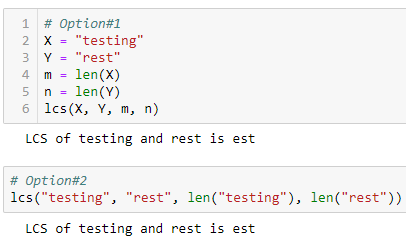

I will use option#2 and define the arguments **X, Y, m, n** as follows with the `lamda row` function
```python
(lambda row : lcs(row['TEXT4'], row['TEXT6'], len(row['TEXT4']), len(row['TEXT6'])), axis = 1)
```

Since I want to have the `lcs` function travel through each row. In order to accomplish this, I am using the `apply` function and have it travel the `lcs` function through each row (i.e. along `axis=1`):
```python
PredObjcWordLists.apply(lambda row : lcs(row['TEXT4'], row['TEXT6'], len(row['TEXT4']), len(row['TEXT6'])), axis = 1)
```

In [345]:
PredObjcWordLists['lcsresults']=PredObjcWordLists.apply(lambda row : lcs(row['TEXT4'], row['TEXT6'], len(row['TEXT4']), len(row['TEXT6'])), axis = 1)

LCS of אַצְדִּ֖יק  and רָשָֽׁע׃  is  
LCS of יַצְדִּ֥יק  and צַדִּ֛יק  is צדִּיק 
LCS of צִדְּקָ֥ה  and נַפְשָׁ֖הּ  is ְָה 
LCS of יִּצְדַּ֖ק  and מַה־ is ַ
LCS of אַצְדִּ֢יק  and אֶ֫תְכֶ֥ם  is אְ 
LCS of צָדַ֣קְתָּ  and זֹ֣את  is ֣ת 


In [347]:
PredObjcWordLists.head(2)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,None
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,None


### Adjusting the `lcs` function into a `lcsreturn` function
As can be seen, the `lcsresults` column is filed with **None**. This has to do with the fact that the results of the lcs print function cannot be stored in the colum. We therefore need to change the final command of the lcs function by replacing the `print` command with the `result` command. I will rename the changed function `lcsreturn`.

In [350]:
# Dynamic programming implementation of LCS problem 
  
# Returns length of LCS for X[0..m-1], Y[0..n-1]  
def lcsreturn(X, Y, m, n): 
    L = [[0 for x in range(n+1)] for x in range(m+1)] 
  
    # Following steps build L[m+1][n+1] in bottom up fashion. Note 
    # that L[i][j] contains length of LCS of X[0..i-1] and Y[0..j-1]  
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0: 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1] + 1
            else: 
                L[i][j] = max(L[i-1][j], L[i][j-1]) 
  
    # Following code is used to print LCS 
    index = L[m][n] 
  
    # Create a character array to store the lcs string 
    lcs = [""] * (index+1) 
    lcs[index] = "" 
  
    # Start from the right-most-bottom-most corner and 
    # one by one store characters in lcs[] 
    i = m 
    j = n 
    while i > 0 and j > 0: 
  
        # If current character in X[] and Y are same, then 
        # current character is part of LCS 
        if X[i-1] == Y[j-1]: 
            lcs[index-1] = X[i-1] 
            i-=1
            j-=1
            index-=1
  
        # If not same, then find the larger of two and 
        # go in the direction of larger value 
        elif L[i-1][j] > L[i][j-1]: 
            i-=1
        else: 
            j-=1

    # Return allows me to store it in the df as a column entry
    return(""  + "".join(lcs))

Lets now run the lcs algorithm again with the updated `lcsreturn` function:

In [353]:
PredObjcWordLists['lcsresults']=PredObjcWordLists.apply(lambda row : lcsreturn(row['TEXT4'], row['TEXT6'], len(row['TEXT4']), len(row['TEXT6'])), axis = 1)

In [355]:
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת


## Adding statistical information
When having a large dataset we would like to filter out those LCS results that embody a high matching value between the first word (in our case the Object) and the second word (in our case the Predicate). In order to allow for such filtering we need additional information added in additional columns. Lets first add information about the string length of each `X` and `Y` word.

In [358]:
# Adding character length information about the Object-word
PredObjcWordLists['Objclength']=PredObjcWordLists.apply(lambda row : len(row['TEXT4']), axis = 1)

In [360]:
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11


In [362]:
# Adding character lenght information about the Predicate-word
PredObjcWordLists['Predlength']=PredObjcWordLists.apply(lambda row : len(row['TEXT6']), axis = 1)

In [364]:
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6


In [366]:
# Adding character lenght information about the LCS-result
PredObjcWordLists['LCSlength']=PredObjcWordLists.apply(lambda row : len(row['lcsresults']), axis = 1)
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3


### Calculating Matching %s
For our research we are interested in displaying:
1. the matching ratio between object-word-lenght and LCS-length
```python
#applied to row#2
10/100*4
=40%
```

2. the matching ratio between predicate-word-lenght and the LCS-length
```python
#applied to row#2
11/100*4
=44%
```

3. the mean ratio of object+predicate-word-lenght andthe LCS-lenght
```python
#applied to row#2
(10+11)/2/100*4
=42%
```



#### Writing a simple `percentage` function
Lets define a percentage function that we can run through the data frame.

In [370]:
 def percentage(v1, v2):
      pctg = float(v1/100 * v2)
      return(pctg)

In [372]:
v1=10
v2=4
percentage(v1,v2)

0.4

##### Caluclating Percentage Ratio Objectlength to LCS lenght
The higher the percentage the more of the Objectword appears in the Predicateword

In [375]:
PredObjcWordLists['LCSmatchObjc']=PredObjcWordLists.apply(lambda row : percentage(row['Objclength'], row['LCSlength']), axis = 1)
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength,LCSmatchObjc
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1,0.11
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7,0.77
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4,0.40
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1,0.11
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3,0.33
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3,0.33


##### Caluclating Percentage Ratio Predicatelength to LCS lenght
The higher the percentage the more of the Predicateword matches with the LCS letters

In [378]:
PredObjcWordLists['LCSmatchPred']=PredObjcWordLists.apply(lambda row : percentage(row['Predlength'], row['LCSlength']), axis = 1)
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength,LCSmatchObjc,LCSmatchPred
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1,0.11,0.09
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7,0.77,0.63
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4,0.40,0.44
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1,0.11,0.04
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3,0.33,0.30
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3,0.33,0.18


#### Writing a simple `meanpercentage` function
Lets define a percentage function that we can run through the data frame and calculates the LCS mean of X+Y matching.
```python
x=(v1+v2)/2 => this would calculate of v1 (lets say "9") and v2 (lets say "5") the mean ((9+5)/2=7)
LCSpercentage=100/x*lcsresult
```

In [381]:
 def meanpercentage(v1, v2, v3):
      mean = float((v1+v2)/2)
      meanpctg = float(100/mean * v3)
      return(meanpctg)

In [383]:
v1=5
v2=4
v3=4
meanpercentage(v1,v2,v3)

88.88888888888889

##### Caluclating Percentage Ratio Predicatelength to LCS lenght
The higher the percentage the more of the Predicateword matches with the LCS letters

In [386]:
PredObjcWordLists['LCSObjcPredMeanMatch']=PredObjcWordLists.apply(lambda row : meanpercentage(row['Objclength'], row['Predlength'], row['LCSlength']), axis = 1)
PredObjcWordLists.head(6)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength,LCSmatchObjc,LCSmatchPred,LCSObjcPredMeanMatch
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1,0.11,0.09,10.000000
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7,0.77,0.63,70.000000
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4,0.40,0.44,38.095238
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1,0.11,0.04,13.333333
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3,0.33,0.30,28.571429
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3,0.33,0.18,35.294118


## Sorting best matches

In [389]:
PredObjcWordLists.sort_values(['LCSObjcPredMeanMatch'], ascending=[False])

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength,LCSmatchObjc,LCSmatchPred,LCSObjcPredMeanMatch
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7,0.77,0.63,70.000000
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4,0.40,0.44,38.095238
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3,0.33,0.18,35.294118
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3,0.33,0.30,28.571429
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1,0.11,0.04,13.333333
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1,0.11,0.09,10.000000


Lets find all values that have a matching mean percentage of at least 40%.

In [392]:
PredObjcWordLists.where(PredObjcWordLists['LCSObjcPredMeanMatch'] > 0.4)

,R,S1,S2,S3,TEXT2,TEXT3,function3,TYPE4,TEXT4,TYPE5,TEXT5,function5,TYPE6,TEXT6,lcsresults,Objclength,Predlength,LCSlength,LCSmatchObjc,LCSmatchPred,LCSObjcPredMeanMatch
0,1,Exodus,23,7,כִּ֥י לֹא־אַצְדִּ֖יק רָשָֽׁע׃,אַצְדִּ֖יק,Pred,word,אַצְדִּ֖יק,phrase,רָשָֽׁע׃,Objc,word,רָשָֽׁע׃,,11,9,1,0.11,0.09,10.000000
1,2,Isaiah,53,11,בְּדַעְתֹּ֗ו יַצְדִּ֥יק צַדִּ֛יק עַבְדִּ֖י לָֽ...,יַצְדִּ֥יק,Pred,word,יַצְדִּ֥יק,phrase,צַדִּ֛יק,Objc,word,צַדִּ֛יק,צדִּיק,11,9,7,0.77,0.63,70.000000
2,3,Jeremiah,3,11,צִדְּקָ֥ה נַפְשָׁ֖הּ מְשֻׁבָ֣ה יִשְׂרָאֵ֑ל מִב...,צִדְּקָ֥ה,Pred,word,צִדְּקָ֥ה,phrase,נַפְשָׁ֖הּ,Objc,word,נַפְשָׁ֖הּ,ְָה,10,11,4,0.40,0.44,38.095238
3,4,Job,9,2,וּמַה־יִּצְדַּ֖ק אֱנֹ֣ושׁ עִם־אֵֽל׃,יִּצְדַּ֖ק,Pred,word,יִּצְדַּ֖ק,phrase,מַה־,Objc,word,מַה־,ַ,11,4,1,0.11,0.04,13.333333
4,5,Job,27,5,אִם־אַצְדִּ֢יק אֶ֫תְכֶ֥ם,אַצְדִּ֢יק,Pred,word,אַצְדִּ֢יק,phrase,אֶ֫תְכֶ֥ם,Objc,word,אֶ֫תְכֶ֥ם,אְ,11,10,3,0.33,0.30,28.571429
5,6,Job,33,12,הֶן־זֹ֣את לֹא־צָדַ֣קְתָּ,צָדַ֣קְתָּ,Pred,word,צָדַ֣קְתָּ,phrase,זֹ֣את,Objc,word,זֹ֣את,֣ת,11,6,3,0.33,0.18,35.294118


## Processing large dataset
We will first run a query on Isiah and Psalms that outputs the consonantal text of Predicate and Object only by using `g_cons_utf8` as a word feature.

In [399]:
PredObjWordListsXL = '''
book book=Psalmi|Jesaia|Genesis|Jeremia|Proverbia|Canticum|Ecclesiastes|Reges_I|Deuteronomium
  clause
    phrase function=Pred
        word g_cons_utf8
    phrase function=Objc
        word g_cons_utf8
'''
PredObjWordListsXL = BHS.search(PredObjWordListsXL)
BHS.table(PredObjWordListsXL, start=1, end=5, condensed=False)

  1.07s 18738 results


n,p,book,clause,phrase,word,phrase,word
1,Genesis 1:1,Genesis,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,אֵ֥ת
2,Genesis 1:1,Genesis,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,הַ
3,Genesis 1:1,Genesis,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,שָּׁמַ֖יִם
4,Genesis 1:1,Genesis,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,וְ
5,Genesis 1:1,Genesis,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,בָּרָ֣א,בָּרָ֣א,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,אֵ֥ת


In [400]:
BHS.export(PredObjWordListsXL, toDir='D:/OneDrive/1200_AUS-research/Fabric-TEXT', toFile='PredObjWordListsXL.tsv')

In [401]:
PredObjWordListsXL=pd.read_csv('D:/OneDrive/1200_AUS-research/Fabric-TEXT/PredObjWordListsXL.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
PredObjWordListsXL.head()

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,TEXT2,NODE3,TYPE3,TEXT3,function3,NODE4,TYPE4,TEXT4,g_cons_utf84,NODE5,TYPE5,TEXT5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86
0,1,Genesis,1,1,426591,book,Genesis,427559,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651574,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא,651576,phrase,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,Objc,5,word,אֵ֥ת,את
1,2,Genesis,1,1,426591,book,Genesis,427559,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651574,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא,651576,phrase,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,Objc,6,word,הַ,ה
2,3,Genesis,1,1,426591,book,Genesis,427559,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651574,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא,651576,phrase,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,Objc,7,word,שָּׁמַ֖יִם,שׁמים
3,4,Genesis,1,1,426591,book,Genesis,427559,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651574,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא,651576,phrase,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,Objc,8,word,וְ,ו
4,5,Genesis,1,1,426591,book,Genesis,427559,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,651574,phrase,בָּרָ֣א,Pred,3,word,בָּרָ֣א,ברא,651576,phrase,אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃,Objc,9,word,אֵ֥ת,את


In [405]:
PredObjWordListsXL=PredObjWordListsXL.drop(columns=["NODE1", "NODE1", "NODE2", "NODE3", "NODE4", "NODE5", "TEXT2", "TEXT3", "TEXT4", "TEXT5", "TYPE1", "TYPE2", "TYPE3"])


In [407]:
PredObjWordListsXL.head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86
0,1,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,5,word,אֵ֥ת,את
1,2,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,6,word,הַ,ה
2,3,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,7,word,שָּׁמַ֖יִם,שׁמים
3,4,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,8,word,וְ,ו
4,5,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,9,word,אֵ֥ת,את


The LCS function can only compare word pairs. When a word in the word pair is missing it will execute an error message and wont output any results. Lets therefore first identify potential unusable rows by searching for **NaN** values.

In [410]:
PredObjWordListsXL[PredObjWordListsXL.isnull().any(axis=1)]

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86
73,74,Genesis,1,22,Genesis,Pred,word,מלאו,phrase,Objc,429,word,NaN,NaN
1552,1553,Genesis,24,31,Genesis,Pred,word,פניתי,phrase,Objc,11731,word,NaN,NaN
1764,1765,Genesis,26,18,Genesis,Pred,word,יקרא,phrase,Objc,13330,word,NaN,NaN
2168,2169,Genesis,30,32,Genesis,Pred,word,הסר,phrase,Objc,16112,word,NaN,NaN
2175,2176,Genesis,30,32,Genesis,Pred,word,הסר,phrase,Objc,16119,word,NaN,NaN
2200,2201,Genesis,30,35,Genesis,Pred,word,יסר,phrase,Objc,16195,word,NaN,NaN
3147,3148,Genesis,42,25,Genesis,Pred,word,ל,phrase,Objc,23869,word,NaN,NaN
3151,3152,Genesis,42,25,Genesis,Pred,word,תת,phrase,Objc,23869,word,NaN,NaN
3421,3422,Genesis,45,21,Genesis,Pred,word,יתן,phrase,Objc,25859,word,NaN,NaN
5271,5272,Deuteronomy,14,28,Deuteronomium,Pred,word,תוציא,phrase,Objc,101947,word,NaN,NaN


The above rows need to be deleted. We can do so by either taking that one row out with
```python
PredObjWordListsXL.drop(['73', '1548', etc...])
```
or by using the `dropna()` function. We will do the latter to remove al `NaN` values:

In [413]:
PredObjWordListsXL = PredObjWordListsXL.dropna()

Now we are ready to run the `lcsresults` function.

In [416]:
PredObjWordListsXL['lcsresults']=PredObjWordListsXL.apply(lambda row : lcsreturn(row['g_cons_utf84'], row['g_cons_utf86'], len(row['g_cons_utf84']), len(row['g_cons_utf86'])), axis = 1)

In [418]:
PredObjWordListsXL.head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults
0,1,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,5,word,אֵ֥ת,את,א
1,2,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,6,word,הַ,ה,
2,3,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,7,word,שָּׁמַ֖יִם,שׁמים,
3,4,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,8,word,וְ,ו,
4,5,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,9,word,אֵ֥ת,את,א


Lets find our case in Isa 53:11

In [421]:
PredObjWordListsXL[
          (PredObjWordListsXL['S1'] == 'Isaiah')
        & (PredObjWordListsXL['S2'] == 53)
        & (PredObjWordListsXL["S3"] == 11)
       ].sort_values(['S2', 'S3'], ascending=[False,True]).head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults
11126,11127,Isaiah,53,11,Jesaia,Pred,word,יצדיק,phrase,Objc,230740,word,צַדִּ֛יק,צדיק,צדיק
11127,11128,Isaiah,53,11,Jesaia,Pred,word,יסבל,phrase,Objc,230746,word,עֲוֹנֹתָ֖ם,עונתם,


Preparing for stats

In [424]:
PredObjWordListsXL['Predlength']=PredObjWordListsXL.apply(lambda row : len(row['g_cons_utf84']), axis = 1)

In [426]:
PredObjWordListsXL['Objclength']=PredObjWordListsXL.apply(lambda row : len(row['g_cons_utf86']), axis = 1)

In [428]:
PredObjWordListsXL['LCSlength']=PredObjWordListsXL.apply(lambda row : len(row['lcsresults']), axis = 1)

In [430]:
PredObjWordListsXL.head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength
0,1,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,5,word,אֵ֥ת,את,א,3,2,1
1,2,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,6,word,הַ,ה,,3,1,0
2,3,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,7,word,שָּׁמַ֖יִם,שׁמים,,3,5,0
3,4,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,8,word,וְ,ו,,3,1,0
4,5,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,9,word,אֵ֥ת,את,א,3,2,1


Lets calculate highest mean

In [433]:
PredObjWordListsXL['LCSObjcPredMeanMatch']=PredObjWordListsXL.apply(lambda row : meanpercentage(row['Predlength'], row['Objclength'], row['LCSlength']), axis = 1)
PredObjWordListsXL.head(6)

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength,LCSObjcPredMeanMatch
0,1,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,5,word,אֵ֥ת,את,א,3,2,1,40.0
1,2,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,6,word,הַ,ה,,3,1,0,0.0
2,3,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,7,word,שָּׁמַ֖יִם,שׁמים,,3,5,0,0.0
3,4,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,8,word,וְ,ו,,3,1,0,0.0
4,5,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,9,word,אֵ֥ת,את,א,3,2,1,40.0
5,6,Genesis,1,1,Genesis,Pred,word,ברא,phrase,Objc,10,word,הָ,ה,,3,1,0,0.0


Lets sort the results in ascending order (100% matches on top, 0% at the bottom of the table)

In [436]:
PredObjWordListsXL.sort_values(['LCSObjcPredMeanMatch'], ascending=[False])

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength,LCSObjcPredMeanMatch
18327,18328,Ecclesiastes,1,17,Ecclesiastes,Pred,word,דעת,phrase,Objc,359557,word,דַ֥עַת,דעת,דעת,3,3,3,100.0
5531,5532,Deuteronomy,18,20,Deuteronomium,Pred,word,דבר,phrase,Objc,103804,word,דָּבָ֜ר,דבר,דבר,3,3,3,100.0
11209,11210,Isaiah,57,7,Jesaia,Pred,word,זבח,phrase,Objc,231661,word,זָֽבַח׃,זבח,זבח,3,3,3,100.0
17731,17732,Proverbs,9,2,Proverbia,Pred,word,טבחה,phrase,Objc,349188,word,טִ֭בְחָהּ,טבחה,טבחה,4,4,4,100.0
7030,7031,1_Kings,2,23,Reges_I,Pred,word,דבר,phrase,Objc,177809,word,דָּבָ֖ר,דבר,דבר,3,3,3,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7950,7951,1_Kings,8,66,Reges_I,Pred,word,שׁלח,phrase,Objc,183640,word,עָ֔ם,עם,,4,2,0,0.0
7951,7952,1_Kings,8,66,Reges_I,Pred,word,יברכו,phrase,Objc,183643,word,אֶת־,את,,5,2,0,0.0
7952,7953,1_Kings,8,66,Reges_I,Pred,word,יברכו,phrase,Objc,183644,word,הַ,ה,,5,1,0,0.0
7953,7954,1_Kings,8,66,Reges_I,Pred,word,יברכו,phrase,Objc,183645,word,מֶּ֑לֶךְ,מלך,,5,3,0,0.0


Lets only look for those cases that have 80% matching:

In [439]:
PredObjWordListsXL[PredObjWordListsXL.LCSObjcPredMeanMatch >= 80].sort_values(['R', 'g_cons_utf84'], ascending=[True,False])

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength,LCSObjcPredMeanMatch
18,19,Genesis,1,11,Genesis,Pred,word,תדשׁא,phrase,Objc,185,word,דֶּ֔שֶׁא,דשׁא,דשׁא,5,4,4,88.888889
629,630,Genesis,11,5,Genesis,Pred,word,ראת,phrase,Objc,5047,word,אֶת־,את,את,3,2,2,80.000000
633,634,Genesis,11,5,Genesis,Pred,word,ראת,phrase,Objc,5051,word,אֶת־,את,את,3,2,2,80.000000
741,742,Genesis,12,7,Genesis,Pred,word,אתן,phrase,Objc,5619,word,אֶת־,את,את,3,2,2,80.000000
1491,1492,Genesis,24,7,Genesis,Pred,word,אתן,phrase,Objc,11248,word,אֶת־,את,את,3,2,2,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,17997,Proverbs,23,6,Proverbia,Pred,word,תלחם,phrase,Objc,353053,word,לֶ֭חֶם,לחם,לחם,4,3,3,85.714286
18065,18066,Proverbs,25,9,Proverbia,Pred,word,ריב,phrase,Objc,353806,word,רִֽ֭יבְךָ,ריבך,ריב,3,4,3,85.714286
18281,18282,Song_of_songs,7,13,Canticum,Pred,word,אתן,phrase,Objc,359035,word,אֶת־,את,את,3,2,2,80.000000
18327,18328,Ecclesiastes,1,17,Ecclesiastes,Pred,word,דעת,phrase,Objc,359557,word,דַ֥עַת,דעת,דעת,3,3,3,100.000000


Lets find again our case in Isa 53:11

In [442]:
PredObjWordListsXL[
          (PredObjWordListsXL['S1'] == 'Isaiah')
        & (PredObjWordListsXL['S2'] == 53)
        & (PredObjWordListsXL["S3"] == 11)
       ].sort_values(['S2', 'S3'], ascending=[False,True]).head()

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength,LCSObjcPredMeanMatch
11126,11127,Isaiah,53,11,Jesaia,Pred,word,יצדיק,phrase,Objc,230740,word,צַדִּ֛יק,צדיק,צדיק,5,4,4,88.888889
11127,11128,Isaiah,53,11,Jesaia,Pred,word,יסבל,phrase,Objc,230746,word,עֲוֹנֹתָ֖ם,עונתם,,4,5,0,0.000000


Lets find all cases that have a higher than 70% matching rate.

In [445]:
PredObjWordListsXL[PredObjWordListsXL.LCSObjcPredMeanMatch > 70].sort_values(['LCSObjcPredMeanMatch', 'S1'], ascending=[False,True]).head(20)

,R,S1,S2,S3,book1,function3,TYPE4,g_cons_utf84,TYPE5,function5,NODE6,TYPE6,TEXT6,g_cons_utf86,lcsresults,Predlength,Objclength,LCSlength,LCSObjcPredMeanMatch
7030,7031,1_Kings,2,23,Reges_I,Pred,word,דבר,phrase,Objc,177809,word,דָּבָ֖ר,דבר,דבר,3,3,3,100.000000
7273,7274,1_Kings,5,17,Reges_I,Pred,word,ל,phrase,Objc,179697,word,לְ,ל,ל,1,1,1,100.000000
7285,7286,1_Kings,5,19,Reges_I,Pred,word,ל,phrase,Objc,179734,word,לְ,ל,ל,1,1,1,100.000000
5531,5532,Deuteronomy,18,20,Deuteronomium,Pred,word,דבר,phrase,Objc,103804,word,דָּבָ֜ר,דבר,דבר,3,3,3,100.000000
18327,18328,Ecclesiastes,1,17,Ecclesiastes,Pred,word,דעת,phrase,Objc,359557,word,דַ֥עַת,דעת,דעת,3,3,3,100.000000
2000,2001,Genesis,29,13,Genesis,Pred,word,שׁמע,phrase,Objc,15198,word,שֵׁ֣מַע׀,שׁמע,שׁמע,4,4,4,100.000000
3146,3147,Genesis,42,25,Genesis,Pred,word,ל,phrase,Objc,23868,word,לַ,ל,ל,1,1,1,100.000000
3248,3249,Genesis,43,16,Genesis,Pred,word,טבח,phrase,Objc,24459,word,טֶ֨בַח֙,טבח,טבח,3,3,3,100.000000
9778,9779,Isaiah,10,6,Jesaia,Pred,word,שׁלל,phrase,Objc,215613,word,שָׁלָל֙,שׁלל,שׁלל,4,4,4,100.000000
9780,9781,Isaiah,10,6,Jesaia,Pred,word,בז,phrase,Objc,215617,word,בַּ֔ז,בז,בז,2,2,2,100.000000


## Visualizing!
### Distribution over Queried Books
Lets do some visualization. Which book has how man LCS matches of 75% or higher?

In [448]:
PredObjWordListsXLplot75 = PredObjWordListsXL[PredObjWordListsXL.LCSObjcPredMeanMatch >= 75]

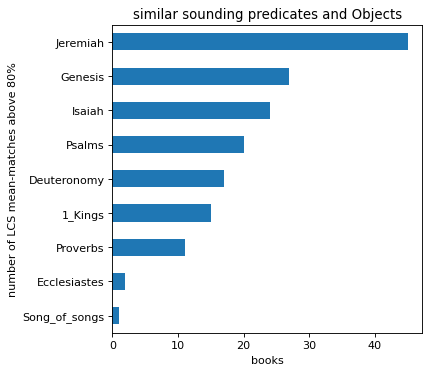

In [450]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
PredObjWordListsXLplot75.groupby("S1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('books')
plt.ylabel('number of LCS mean-matches above 80%')
plt.title('similar sounding predicates and Objects')
plt.show()

Lets see how the LCS phenomenon is distributed over the different books according to its matching percentage.

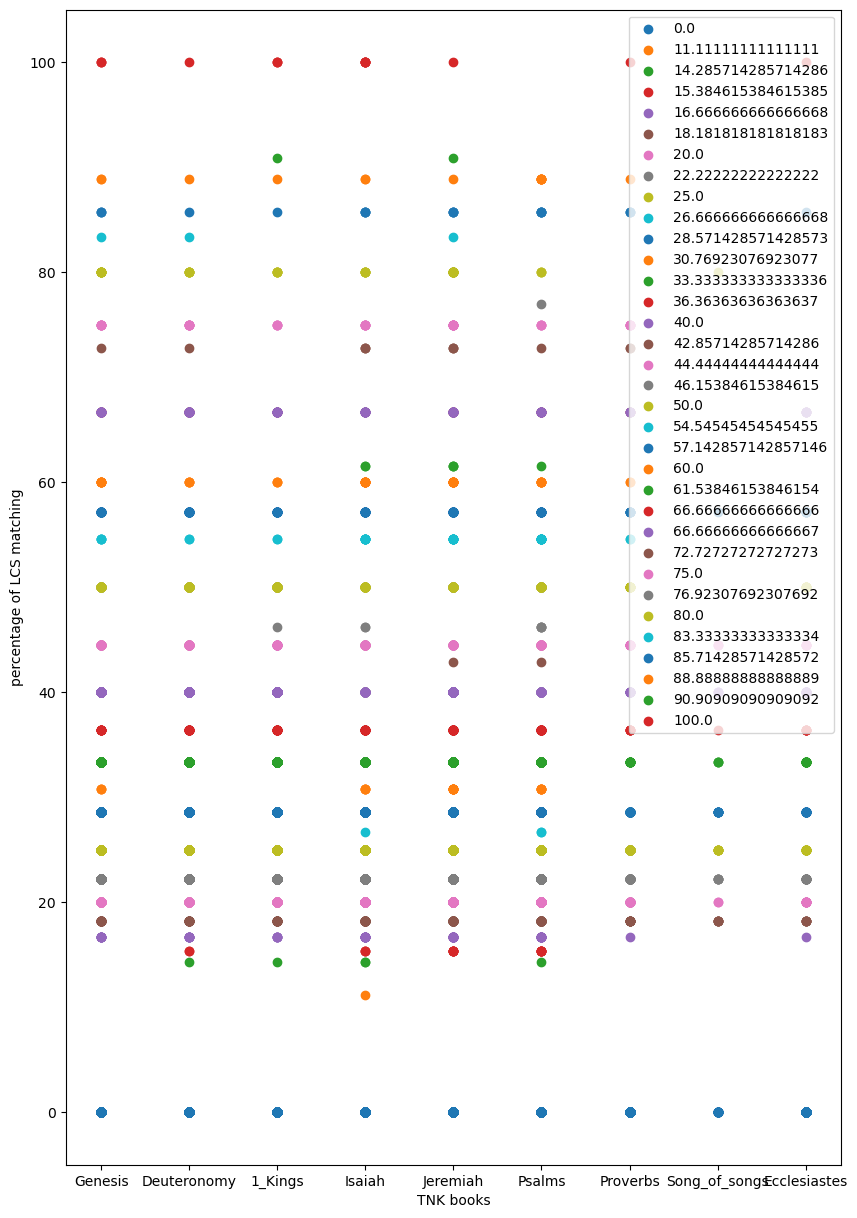

In [453]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 15)

for S1, df in PredObjWordListsXL.groupby('LCSObjcPredMeanMatch'):
    ax.scatter(x="S1", y="LCSObjcPredMeanMatch", data=df, label=S1)

ax.set_xlabel("TNK books")
ax.set_ylabel("percentage of LCS matching")
ax.legend();

Text(0.5, 28.999999999999986, 'OT books')

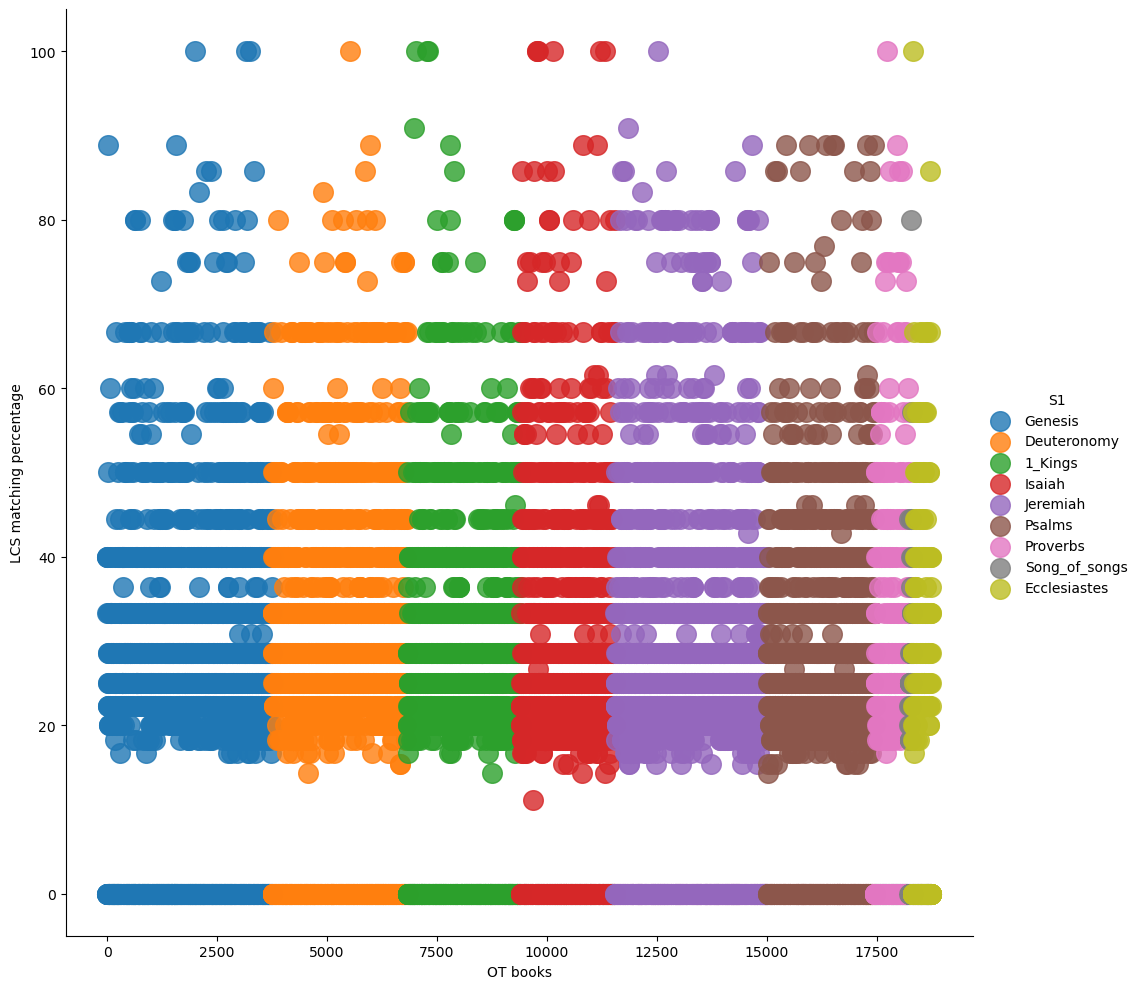

In [454]:
sns.lmplot(x="R", y="LCSObjcPredMeanMatch", data=PredObjWordListsXL, hue='S1', height=10, aspect=1/1, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('LCS matching percentage')
ax.set_xlabel('OT books')

We can see quickly that Isiah, Jeremiah, and Psalms have a much higher density of high matching (>=80%) LCS cases.

### Distributions in Isiah's chapters
Lets have a look at the distribution of the phenomena over the different chapters in Isiah. While we do so, lets compare the >=90% matching with a >=60% matching in Isiah.

In [459]:
PredObjWordListsXLplot60 = PredObjWordListsXL[PredObjWordListsXL.LCSObjcPredMeanMatch >= 60]

Text(0, 0.5, 'LCS matching percentage')

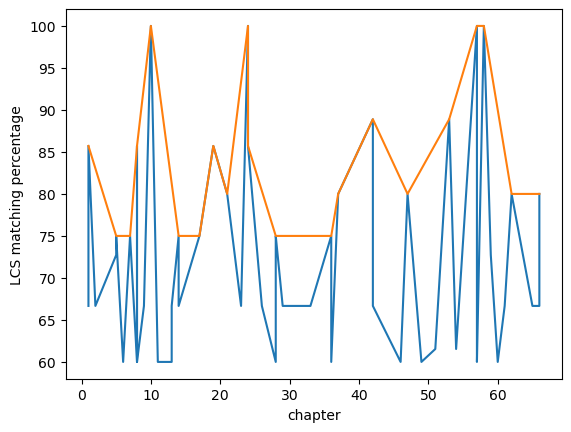

In [461]:
PredObjWordListsXLplot75Isa = PredObjWordListsXLplot75[PredObjWordListsXLplot75.S1 == 'Isaiah']
PredObjWordListsXLplot60Isa = PredObjWordListsXLplot60[PredObjWordListsXLplot60.S1 == 'Isaiah']

plt.plot(PredObjWordListsXLplot60Isa.S2,PredObjWordListsXLplot60Isa.LCSObjcPredMeanMatch)
plt.plot(PredObjWordListsXLplot75Isa.S2,PredObjWordListsXLplot75Isa.LCSObjcPredMeanMatch)
plt.xlabel("chapter")
plt.ylabel("LCS matching percentage")

Now, lets see how the LCS phenomenon is distributed over the different chapters of Isiah:

In [464]:
PredObjWordListsXLIsaAll = PredObjWordListsXL[PredObjWordListsXL.S1 == 'Isaiah']

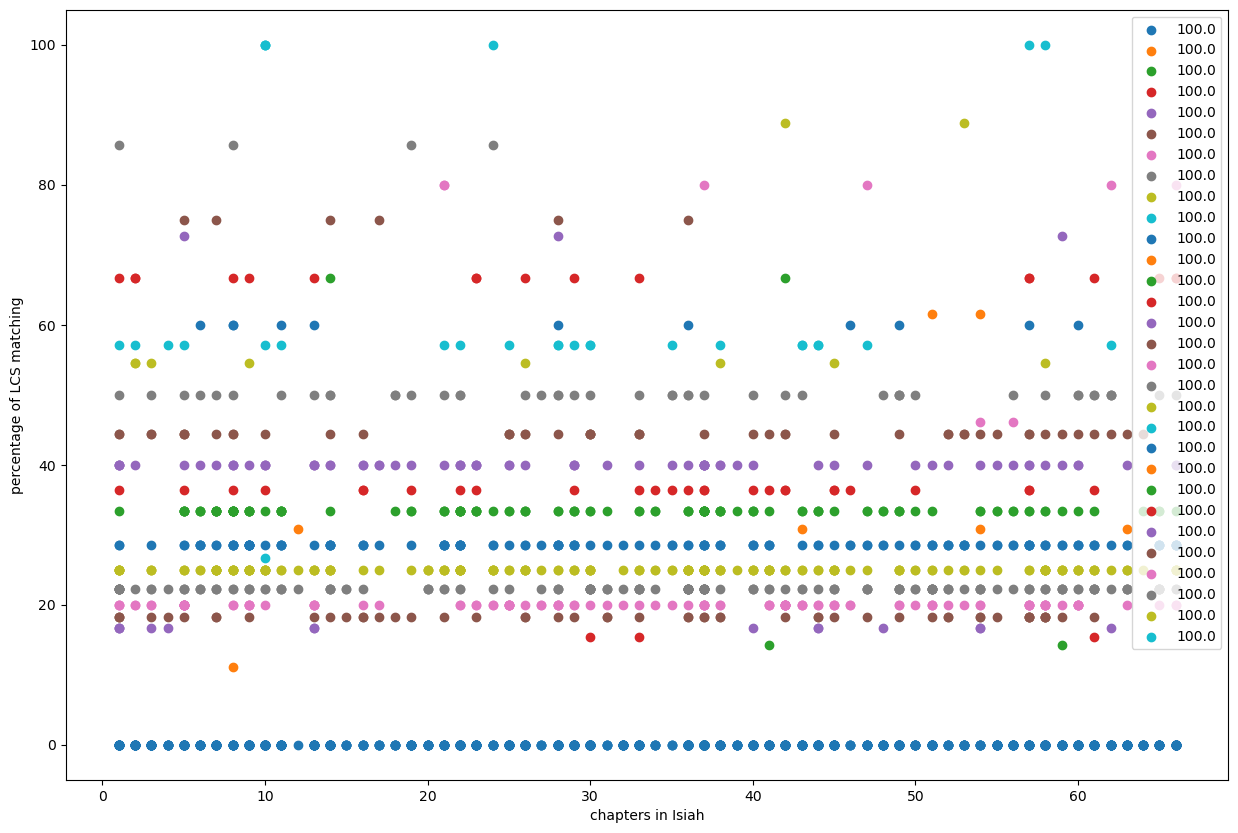

In [466]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

for S2, df in PredObjWordListsXLIsaAll.groupby('LCSObjcPredMeanMatch'):
    ax.scatter(x="S2", y="LCSObjcPredMeanMatch", data=df, label=S1)

ax.set_xlabel("chapters in Isiah")
ax.set_ylabel("percentage of LCS matching")
ax.legend();

Text(0.5, 28.999999999999986, 'chapters')

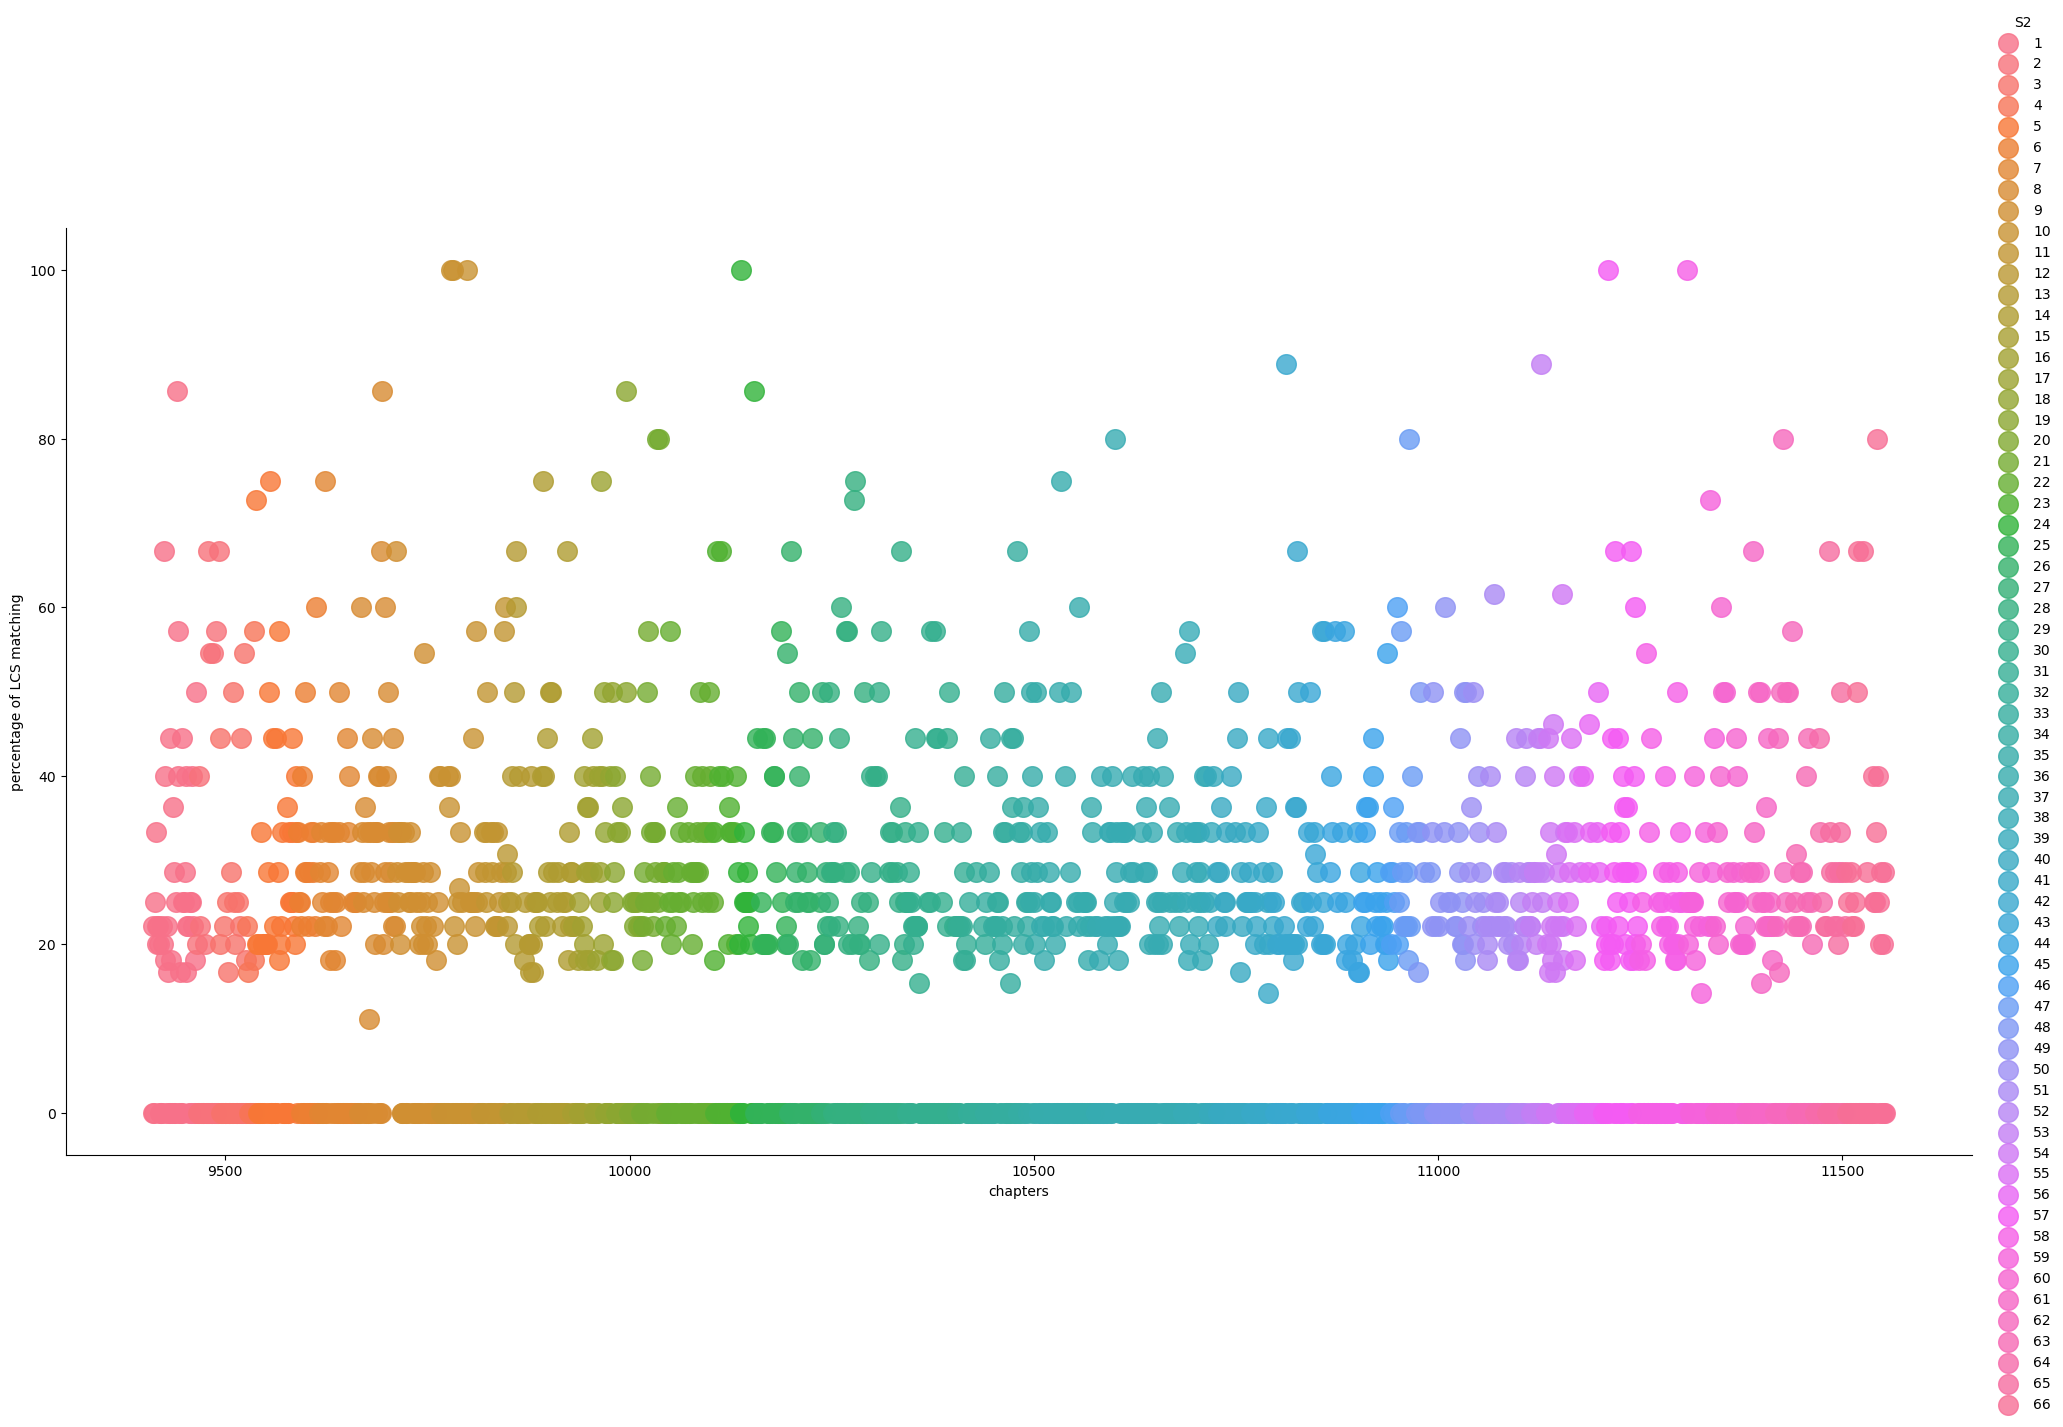

In [468]:
sns.lmplot(x="R", y="LCSObjcPredMeanMatch", data=PredObjWordListsXLIsaAll, hue='S2', height=10, aspect=2/1, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('percentage of LCS matching')
ax.set_xlabel('chapters')

# MISC

## version: Rosettacode.org

In [472]:
#https://rosettacode.org/wiki/Longest_common_subsequence#Python


def lcs2(a, b):
    # generate matrix of length of longest common subsequence for substrings of both words
    lengths = [[0] * (len(b)+1) for _ in range(len(a)+1)]
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
 
    # read a substring from the matrix
    result = ''
    j = len(b)
    for i in range(1, len(a)+1):
        if lengths[i][j] != lengths[i-1][j]:
            result += a[i-1]
 
    return result

In [474]:
a = "GTY"
b = "GXTXAYB"
lcs2(a,b)

'GTY'